In [1]:
# from flask import Flask
# import ghhops_server as hs
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

import all_graphs
from utils import *

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
sns.load_dataset('tips')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [2]:
df = pd.read_csv('../GH_example/test.csv', lineterminator='@')
df

,hour,season,drybulb,direct_normal_rad
0,0,spring,28.50,0
1,1,spring,22.35,0
2,2,spring,22.50,0
3,3,spring,22.35,0
4,4,spring,21.90,0
...,...,...,...,...
8755,8755,winter,29.85,0
8756,8756,winter,29.10,0
8757,8757,winter,28.80,0
8758,8758,winter,28.65,0


In [3]:
def empty2none(args):
    for k, v in args.items():
        if type(v) == str:
            args[k] = None if v == '' else v
    return args

def clean_args(args):  
    # remove optional args
    args.pop('add_args')
    args.pop('axis_args')
    args.pop('despine')
    
    args = empty2none(args)
    
    return args
    

def box(data, x, y, hue, palette, despine={}, add_args={}, axis_args={}):
    # https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot
    
    args = clean_args(locals())

    g = sns.boxplot(**args, **add_args)
    g.set(**axis_args)
        
    if despine:
        sns.despine(**despine)
    
    # tight layout
    plt.tight_layout()
    
    return g
    
    # return base64img()

In [4]:
import json

data = '{}'
ax_args = json.loads(data)
ax_args


{}

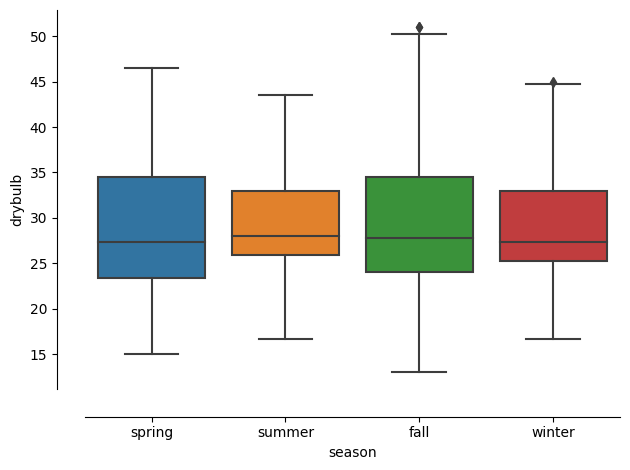

In [5]:

# plot
g = box(data = df, x= 'season', y= 'drybulb', hue= '', palette= '', axis_args=ax_args, despine={'offset': 20})

plt.show()

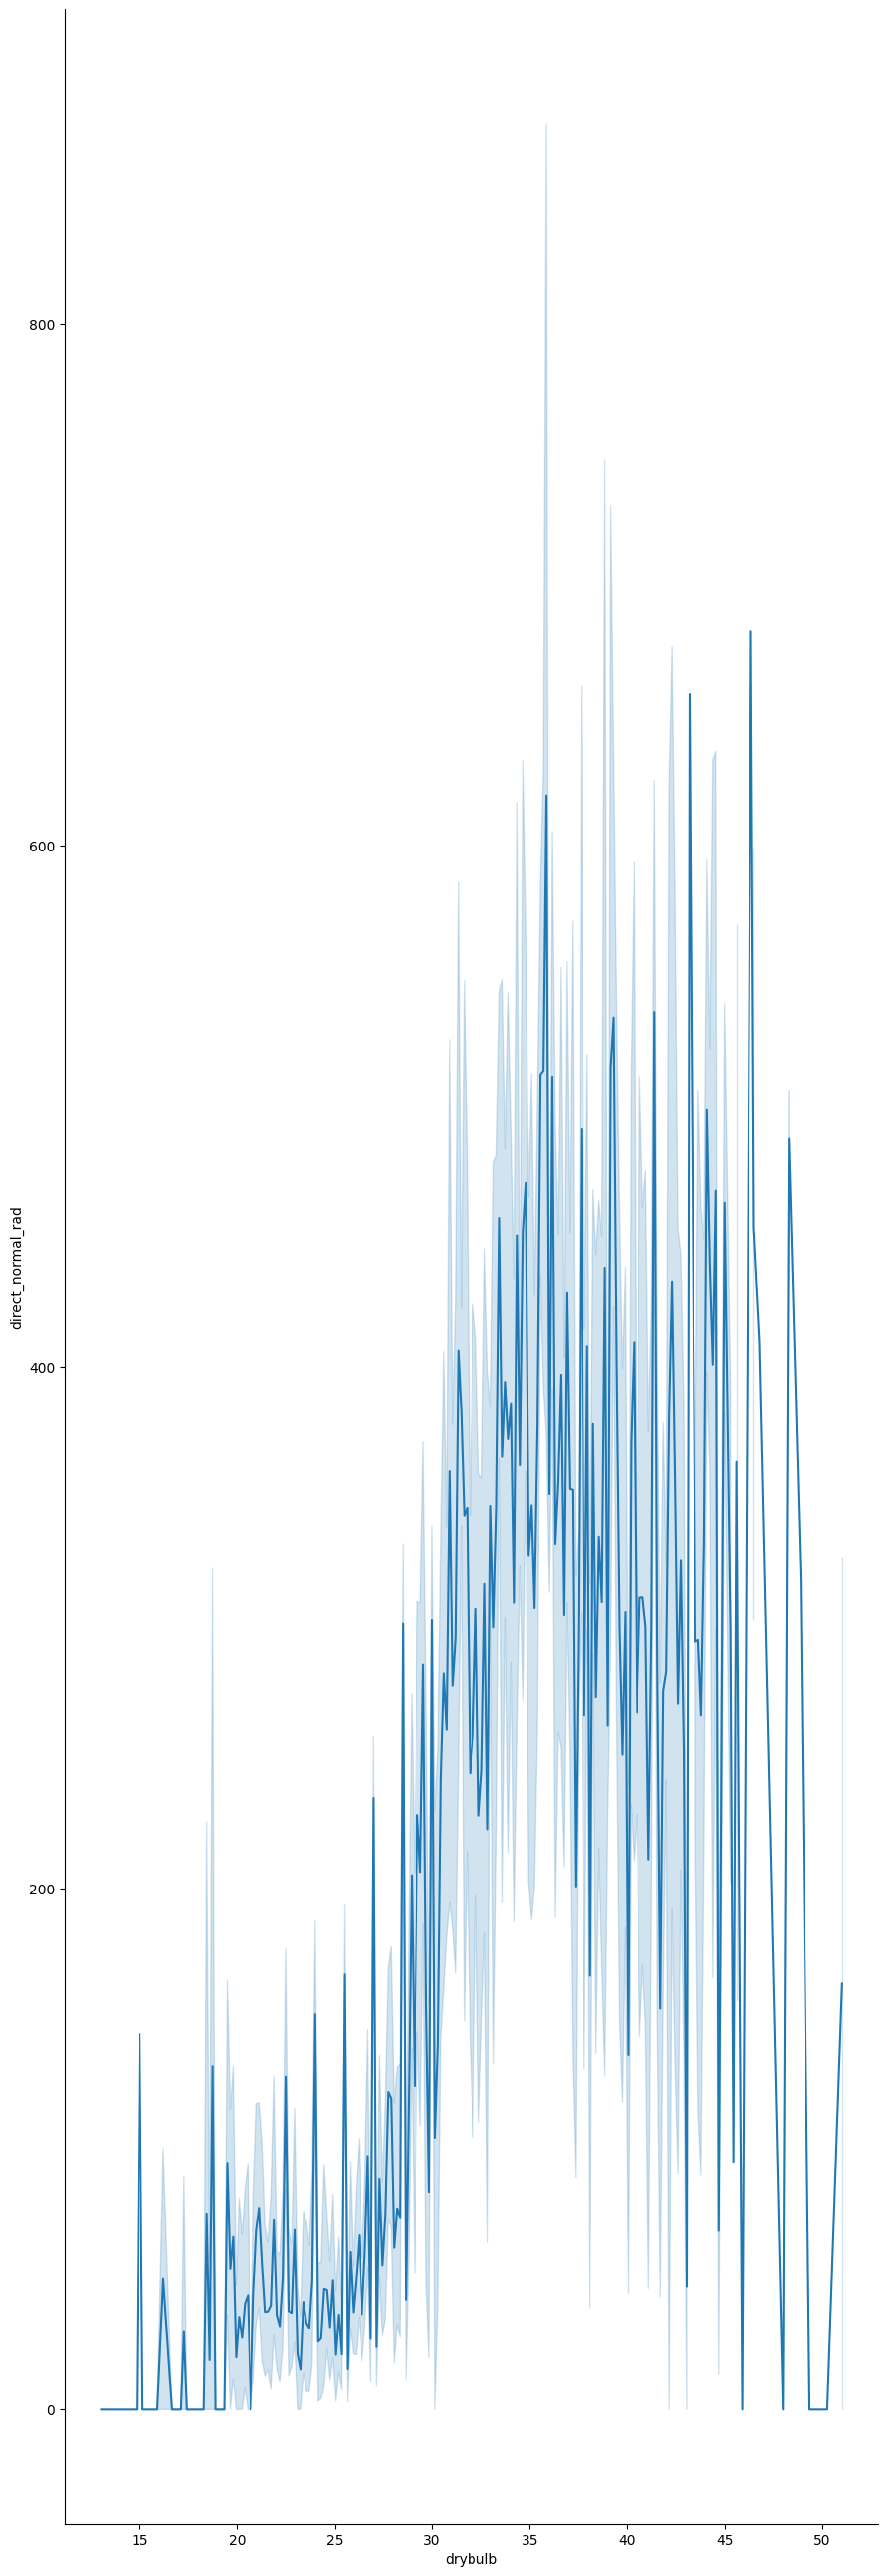

In [16]:
g = sns.relplot(x='drybulb',y='direct_normal_rad', data=df, kind='line')
g.figure.set_figwidth(10)
g.figure.set_figheight(30)

In [21]:
def json_parser(*json_str):
    
    return [json.loads(f) for f in json_str]

In [22]:
g_despine = '{"offset": 20}'
g_add_args = '{"test": 10}'
g_ax_args = '{"third": 100}'

g_despine, g_add_args, g_ax_args = json_parser(g_despine, g_add_args, g_ax_args)

print(g_despine, g_add_args, g_ax_args)


{'offset': 20} {'test': 10} {'third': 100}
